UCSanDiegoX: DSE200x Python for Data Science

Week 5 - matplotlib

Data from Kaggle - World Development Indicators

https://www.kaggle.com/worldbank/world-development-indicators/downloads/Indicators.csv/2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
print(data.shape)
data.head()

(5656458, 6)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [3]:
# count uniques countries
countries = data['CountryName'].unique().tolist()
print('Countries:', len(countries))

# same as country codes?
countryCodes = data['CountryCode'].unique().tolist()
print('Country codes:', len(countryCodes))

# how many indicators?
indicators = data['IndicatorName'].unique().tolist()
print('Indicators:', len(indicators))

# years
years = data['Year'].unique().tolist()
print('Data on', len(years), 'years, ranging from', min(years), 'to', max(years))

Countries: 247
Country codes: 247
Indicators: 1344
Data on 56 years, ranging from 1960 to 2015


Basic Plotting in Matplotlib: Part 1

In [4]:
# select CO2 emissions for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage = data[mask1 & mask2]

          CountryName CountryCode                           IndicatorName  \
22232   United States         USA  CO2 emissions (metric tons per capita)   
48708   United States         USA  CO2 emissions (metric tons per capita)   
77087   United States         USA  CO2 emissions (metric tons per capita)   
105704  United States         USA  CO2 emissions (metric tons per capita)   
134742  United States         USA  CO2 emissions (metric tons per capita)   

         IndicatorCode  Year      Value  
22232   EN.ATM.CO2E.PC  1960  15.999779  
48708   EN.ATM.CO2E.PC  1961  15.681256  
77087   EN.ATM.CO2E.PC  1962  16.013937  
105704  EN.ATM.CO2E.PC  1963  16.482762  
134742  EN.ATM.CO2E.PC  1964  16.968119  


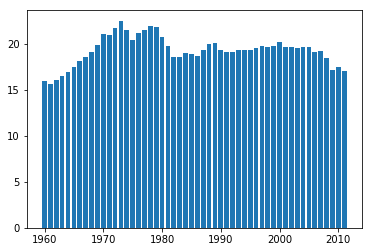

In [5]:
print(stage.head())

# how emissions have changed over time using MatplotLib
# get the years
years = stage['Year'].values
# get the values 
co2 = stage['Value'].values

# create
plt.bar(years,co2)
plt.show()

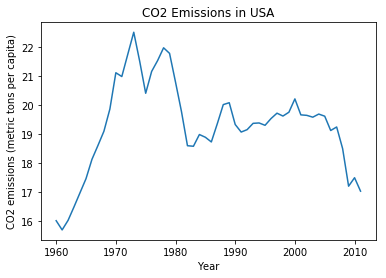

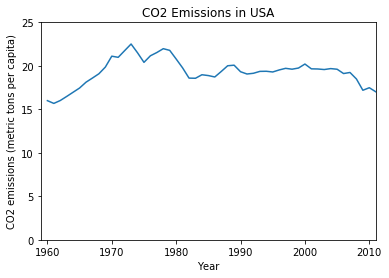

In [6]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emissions in USA')
plt.show()

# to make more honest, start they y axis at 0
plt.plot(stage['Year'].values, stage['Value'].values)
plt.axis([1959, 2011,0,25])
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])
plt.title('CO2 Emissions in USA')

plt.show()

In [7]:
# select CO2 emissions for Italy
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'ITA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

ita = data[mask1 & mask2]

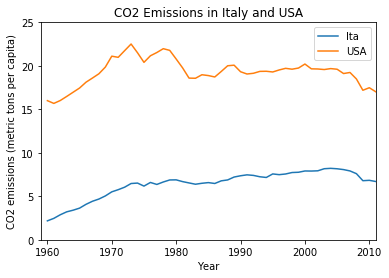

In [8]:
plt.plot(ita['Year'].values, ita['Value'].values)
plt.plot(stage['Year'].values, stage['Value'].values)
plt.xlabel('Year')
plt.ylabel(ita['IndicatorName'].iloc[0])
plt.title('CO2 Emissions in Italy and USA')
plt.axis([1959, 2011, 0, 25])
plt.legend(['Ita', 'USA'])
plt.show()

52


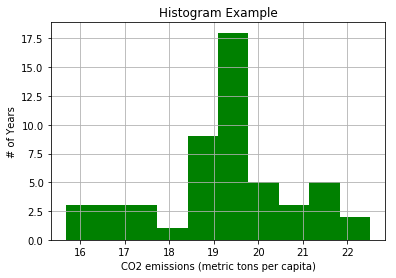

In [9]:
# Using Histograms to explore the distribution of values
hist_data = stage['Value'].values
print(len(hist_data))

plt.hist(hist_data, 10, facecolor='green') # no density but actual values

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)
plt.show()

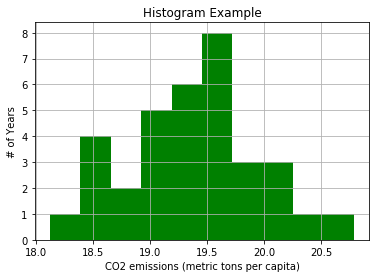

In [10]:
# or, include just those within one standard deviation fo the mean
lower = stage['Value'].mean() - stage['Value'].std()
upper = stage['Value'].mean() + stage['Value'].std()
hist_data_centered = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

plt.hist(hist_data_centered, 10, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)
plt.show()

In [11]:
# how do the USA's numbers relate to those of other countries?
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
print(len(co2_2011))

co2_2011.head()

232


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


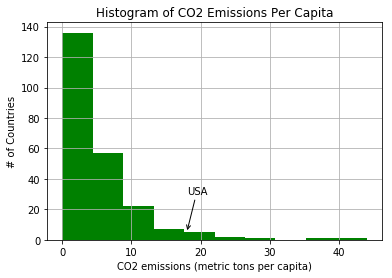

In [12]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA", xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.hist(co2_2011['Value'], 10, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

# plt.axis([10, 22, 0, 14])
plt.grid(True)
plt.show()

Basic Plotting in Matplotlib Part 2

In [13]:
# Relationship between GPD and CO2 Emissions in USA

# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


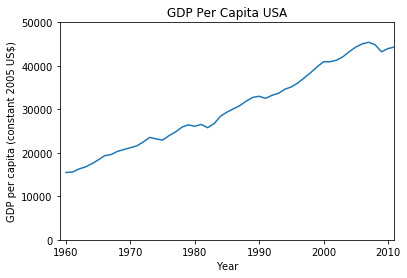

In [14]:
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])
plt.title('GDP Per Capita USA')
plt.axis([1959, 2011, 0, 50_000])
plt.show()

In [15]:
# ScatterPlot for comparing GDP against CO2 emissions (per capita)
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

# compare GPD and CO2 only for years where both are available
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011
52
52


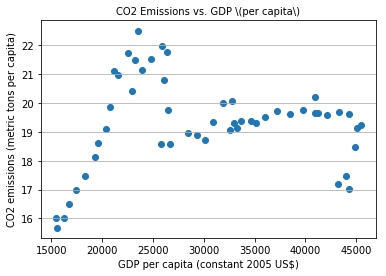

In [16]:
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

In [17]:
# check correlation (very weak indeed)
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

### Exploring Indicators

In [18]:
import random

In [35]:
# explore randomly
yearsFilter = [2010, 2011, 2012, 2013, 2014]

filteredData1 = []
filteredData2 = []

while(len(filteredData1) < len(yearsFilter)-1):
    # pick new indicator
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = random.sample(countries, 2)
    # how many rows are there that have this country name, this indicator, and this year. 
    # Mesh gives bool vector
    filterMesh = ((data['CountryName'] == countryFilter[0])
                  & (data['IndicatorName'].isin(indicatorsFilter))
                  & (data['Year'].isin(yearsFilter)))
    # which rows have this condition to be true?
    filteredData1 = data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]

    # need to print this only when our while condition is true
    if(len(filteredData1) < len(yearsFilter)-1):
        print('Skipping {} since {} rows found'.format(indicatorsFilter, len(filteredData1)))

while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = ((data['CountryName'] == countryFilter[1])
                  & (data['IndicatorName'].isin(indicatorsFilter))
                  & (data['Year'].isin(yearsFilter)))
    filteredData2 = data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    
    if(len(filteredData2) < len(filteredData1)-1):
        print('Skipping {} since {} rows found'.format(old, len(filteredData2)))
        
indicatorsFilter, countryFilter, len(filteredData1), len(filteredData2)

Skipping ['Household final consumption expenditure, etc. (current US$)'] since 0 rows found
Skipping ['Household final consumption expenditure, etc. (constant LCU)'] since 0 rows found


(['Gross enrolment ratio, primary, gender parity index (GPI)'],
 ['Yemen, Rep.', 'Luxembourg'],
 4,
 4)

In [40]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)
    
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

print(filteredData1['CountryName'])
print(filteredData2['CountryName'])

5023954    Yemen, Rep.
5200119    Yemen, Rep.
5375251    Yemen, Rep.
5532310    Yemen, Rep.
Name: CountryName, dtype: object
4860864    Upper middle income
5046326    Upper middle income
5222543    Upper middle income
5395917    Upper middle income
Name: CountryName, dtype: object


Scatter Plot

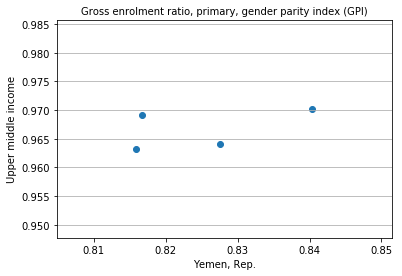

In [41]:
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title(indicatorsFilter[0],fontsize=10)
axis.set_xlabel(filteredData1['CountryName'].iloc[0],fontsize=10)
axis.set_ylabel(filteredData2['CountryName'].iloc[0],fontsize=10)

X = filteredData1['Value']
Y = filteredData2['Value']

axis.scatter(X, Y)